In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [4]:
tokenizer = Tokenizer()

data = open('rabindrasangeet.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

#print(tokenizer.word_index)
#print(total_words)


In [5]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [10]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)

Epoch 1/100


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


286/286 [==============================] - 9s 23ms/step - loss: 7.9522 - accuracy: 0.0102
Epoch 2/100
286/286 [==============================] - 6s 22ms/step - loss: 7.0817 - accuracy: 0.0361
Epoch 3/100
286/286 [==============================] - 6s 22ms/step - loss: 5.8390 - accuracy: 0.0882
Epoch 4/100
286/286 [==============================] - 6s 23ms/step - loss: 4.1514 - accuracy: 0.2201
Epoch 5/100
286/286 [==============================] - 7s 23ms/step - loss: 2.5744 - accuracy: 0.4625
Epoch 6/100
286/286 [==============================] - 7s 23ms/step - loss: 1.6022 - accuracy: 0.6451
Epoch 7/100
286/286 [==============================] - 7s 23ms/step - loss: 1.0496 - accuracy: 0.7692
Epoch 8/100
286/286 [==============================] - 7s 23ms/step - loss: 0.7588 - accuracy: 0.8323
Epoch 9/100
286/286 [==============================] - 7s 23ms/step - loss: 0.6154 - accuracy: 0.8631
Epoch 10/100
286/286 [==============================] - 7s 23ms/step - loss: 0.5434 - accuracy

286/286 [==============================] - 7s 23ms/step - loss: 0.4227 - accuracy: 0.8792
Epoch 81/100
286/286 [==============================] - 7s 23ms/step - loss: 0.4242 - accuracy: 0.8787
Epoch 82/100
286/286 [==============================] - 7s 23ms/step - loss: 0.4231 - accuracy: 0.8808
Epoch 83/100
286/286 [==============================] - 7s 23ms/step - loss: 0.4206 - accuracy: 0.8817
Epoch 84/100
286/286 [==============================] - 7s 23ms/step - loss: 0.4292 - accuracy: 0.8783
Epoch 85/100
286/286 [==============================] - 7s 23ms/step - loss: 0.4667 - accuracy: 0.8732
Epoch 86/100
286/286 [==============================] - 7s 24ms/step - loss: 1.3901 - accuracy: 0.6824
Epoch 87/100
286/286 [==============================] - 7s 25ms/step - loss: 2.1718 - accuracy: 0.5416
Epoch 88/100
286/286 [==============================] - 7s 23ms/step - loss: 1.1378 - accuracy: 0.7191
Epoch 89/100
286/286 [==============================] - 7s 23ms/step - loss: 0.7219 - 

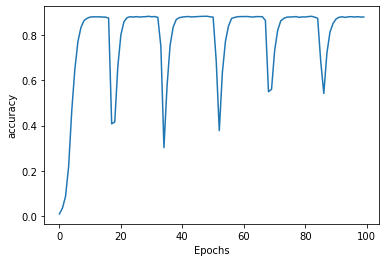

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
plot_graphs(history, 'accuracy')


In [17]:
seed_text = "aalo aamar "
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predict_x=model.predict(token_list, verbose=0) 
    predicted=np.argmax(predict_x,axis=1)
    #predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

aalo aamar  aalo ogo aalo bhuban bhara dekhar tomari hok na saara ki niye na ki re moder ghuchbe na bhul go moder ghuchbe na aar non go kaaje baaje niketane bujhi naaiko jeyo na chole gelo jaatri barsho sukho khaneko paabo tobe hare nibe ke jaane na gandhe jaay nayone hridayoduware ghaa diyo baani emon aaghat korun tomari ore bone kaar taay diyi chokher jwaler paala sango hey' bala maajhe taara je haara naai go' ghum holo rongin re porichay hey priyotamo roechhe taai jibano biphalo hoy je dole taar birahobyathar re gaan nijhar deshe re gharer ki rabe mukhe moner
